# tree

In [407]:
class Node:
    def __init__(self, index, depth=0):
        self.index = index
        self.depth = depth
        self.left_child = None
        self.right_child = None
        self.left_bound = None
        self.right_bound = None

In [408]:
def breadth_first(root):
 
    current_nodes = [root]
    
    while True:
        
        prev_nodes = current_nodes
        current_nodes = []
        
        for node in prev_nodes:
            print(node.index)
            current_nodes.append(node.left_child)
            current_nodes.append(node.right_child)
        
        if all(node is None for node in current_nodes):
            break

In [409]:
# iterative tree building
def build_tree(root, depth):
    root.index = 0
    current_nodes = [root]
    
    counter = 1

    for i in range(0, depth):
        
        new_nodes = []
        
        for node in current_nodes:
            node.left_child = Node(counter, i+1)
            counter += 1
            node.right_child = Node(counter, i+1)
            counter += 1
            new_nodes.append(node.left_child)
            new_nodes.append(node.right_child)
        
        current_nodes = new_nodes.copy()
        
    return(root)

In [410]:
depth = 3
root = Node(0, 0)
build_tree(root, 3)

In [411]:
root.right_child.right_child.right_child.depth

3

In [412]:
cutpoints = [500, 250, 150, 275, 750, 600, 900]

def depth_first(root, max_depth=10):
 
    if (root == None):
        return
 
    st = []
 
    # start from root node (set current node to root node)
    curr = root
    curr_depth = 0
    # run till stack is not empty or current is
    # not NULL
    while (len(st) or curr != None):
     

        # Print left children while exist
        # and keep appending right into the
        # stack.
        while (curr != None):

            print(curr.index, end = " ")
            cutpoints[curr.index] = cutpoints[curr.index] + 2
            print(f"index:\t{curr.index}\tLB:\t{curr.left_bound}\tRB:\t{curr.right_bound}")
    
            if (curr.right_child != None):
            
                curr.right_child.left_bound = cutpoints[curr.index]
                curr.right_child.right_bound = curr.right_bound
                
                if(curr_depth < max_depth):
                    st.append(curr.right_child)

 
            if (curr.left_child != None):
                curr.left_child.left_bound = curr.left_bound
                curr.left_child.right_bound = cutpoints[curr.index]

            if (curr_depth < max_depth):
                curr = curr.left_child
                curr_depth += 1
            else:
                curr = None

         
        # We reach when curr is NULL, so We
        # take out a right child from stack
        if (len(st) > 0):

            curr = st[-1]
            st.pop()

In [431]:
# Iterative function for inorder tree traversal
def inorder(root, max_depth):
     
    # Set current to root of binary tree
    current = root
    current_depth = 0
    stack = [] # initialize stack
    out = []
     
    while True:
         
        # Reach the left most Node of the current Node
        if current is not None:
             
            # Place pointer to a tree node on the stack
            # before traversing the node's left subtree
            stack.append(current)
            current = current.left_child
            current_depth += 1


        # BackTrack from the empty subtree and visit the Node
        # at the top of the stack; however, if the stack is
        # empty you are done
        elif(stack):
            current = stack.pop()
            
            if current.depth <= max_depth:
                out.append(current)
         
            # We have visited the node and its left
            # subtree. Now, it's right subtree's turn
            current = current.right_child
 
        else:
            break

      
    print()
    return(out)

In [432]:
depth = 3
root = Node(0)
build_tree(root, depth)
# breadth_first(root)
# depth_first(root, 2)
for i in range(0, depth+1):
    out = inorder(root, i)
    print([c.index for c in out])


[0]

[1, 0, 2]

[3, 1, 4, 0, 5, 2, 6]

[7, 3, 8, 1, 9, 4, 10, 0, 11, 5, 12, 2, 13, 6, 14]


# data gen

In [429]:
from scipy.optimize import minimize
import scipy.stats
import torch
import torch.optim as optim
import scipy
# shifted and scaled sigmoid function
def test_sigmoid(x, a=0, b=1.):
    return 1 / (1 + (np.exp(-1 * (x - a) / b)))

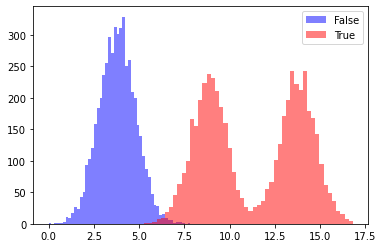

In [430]:
# from cutpoint_model import Model
import numpy as np
import matplotlib.pyplot as plt
from math import exp

N = 10000
P = 5

rs = np.random.RandomState(1978)

X = rs.randn(N, P)
w = rs.randn(P)

y_prob = test_sigmoid(X @ w)
y = (rs.rand(N) < y_prob).astype(int)
t = (rs.randn(N) + 5 * y + (rs.rand(N)> 0.5) * 5 * y )

# make times positive
t += abs(min(t))

plt.hist(t[y==0], bins=50, alpha = 0.5, color = "blue", label="False")
plt.hist(t[y==1], bins=50, alpha = 0.5, color = "red", label="True")
plt.legend()
plt.show()

In [ ]:
#             #####################################
#             # breadth first traversal

#             current_nodes = [self.root]
    
#             while True:

#                 current_thetas = [self.theta[node.index] for node in current_nodes]
#                 cutpoint_logits = [self.cutpoint_logit[node.index] for node in current_nodes]
#                 left_boundaries = [node.left_bound for node in current_nodes]
#                 right_boundaries = [node.right_bound for node in current_nodes]


#                 loss += self.multinomial_loss(current_thetas, cutpoint_logits, left_boundaries, right_boundaries)
            
#                 new_nodes = []

#                 print("==============================================")
#                 for node in prev_nodes:
#                     print(f"index:\t{node.index}\tLB:\t{node.left_bound}\tvalue:\t{self.cutpoint_logit[node.index]}\t\tRB:\t{node.right_bound}")

#                     current_nodes.append(node.left_child)
#                     current_nodes.append(node.right_child)
                    
#                     if (node.right_child != None):
#                         node.right_child.left_bound = self.cutpoint_logit[node.index]
#                         node.right_child.right_bound = node.right_bound

#                     if (node.left_child != None):
#                         node.left_child.left_bound = node.left_bound
#                         node.left_child.right_bound = self.cutpoint_logit[node.index]
                
#                 current_nodes =  
                        
                        
#                 if all(node is None for node in current_nodes):
#                     break

#             # end BFS
#             ###################################

In [449]:
# torch.autograd.set_detect_anomaly(True)
class Model:
    def __init__(self, X, t, sigmoid_temp = 0.01, depth = 1, cutpoint0=None):
        self.X = torch.tensor(X, dtype=torch.float)
        self.t = torch.tensor(t, dtype=torch.float)
        self.t_convert = (self.t - min(self.t)) / (max(self.t) - min(self.t))
        self.sigmoid_temp = sigmoid_temp 
        self.depth = depth

        self.n_cutpoints = 2**(depth+1)-1
        self.theta = [torch.zeros( X.shape[1]+1, requires_grad=True).float() for i in range(0,self.n_cutpoints)]
            
        self.cutpoint_logit = [torch.tensor(self.logit(torch.tensor(cutpoint)).item(), requires_grad=True) for cutpoint in cutpoint0]
    
        # set up cutpoint tree
        self.root = Node(0)
        root.left_bound = min(self.t)
        root.right_bound = max(self.t)
        self.root = build_tree(root, depth)
        
        
    def logit(self, x):
        return torch.log(x/ (1 - x))
    
    # shifted and scaled sigmoid function
    def sigmoid(self, x, a=0, b=1.):
        return 1 / (1 + (torch.exp(-1 * (x - a) / b)))
    
    
    def pred_value(self, x, theta):
        prod = torch.matmul(x,theta)
        return self.sigmoid(prod)
    
    
    def multinomial_loss(self, thetas, cutpoint_logits):

        n = len(self.t)

        # scale cutpoints to [0,1]
        cutpoints = [self.sigmoid(cp_logit) for cp_logit in cutpoint_logits]
        #-> this gives you a list with ALL boundaries you'll need at this level
        
        # Matt loop way here:
#       for lb, rb in zip([0] + cutpoints, cutpoints + [max(self.t)]):
            
        
        likelihood = 0
        prior = 0
        
        x1 = torch.cat([self.X, torch.ones((len(self.X), 1))], axis=1)
        
        for curr in range(0, len(cutpoints)+1):
            
            if curr == 0:
                #left_boundary = self.sigmoid(torch.tensor(0), 0, self.sigmoid_temp)
                left_boundary = self.sigmoid(self.t, torch.tensor(0), self.sigmoid_temp)
            else:
                #left_boundary = self.sigmoid(cutpoints[curr-1], 0, self.sigmoid_temp)
                left_boundary = self.sigmoid(self.t, cutpoints[curr-1], self.sigmoid_temp)

            if curr == len(cutpoints):# + 1:
                #right_boundary = self.sigmoid(torch.tensor(max(self.t)), 0, self.sigmoid_temp)
                right_boundary = -1 * self.sigmoid(self.t, torch.tensor(max(self.t)), self.sigmoid_temp)
            else:
                #right_boundary = self.sigmoid(cutpoints[curr], 0, self.sigmoid_temp)      
                right_boundary = -1 * self.sigmoid(self.t, cutpoints[curr], self.sigmoid_temp)
                
            #t_disc.append(left_boundary * right_boundary)

            #cutpoint = cutpoints[curr]
            #theta = thetas[curr]
            
            #ignore t_disc = torch.stack(t_disc) # stack all of the individual t_discs into a single 2d array
            
            #t_disc = self.sigmoid(self.t, cutpoint, self.sigmoid_temp)
            p_hat = self.pred_value(x1, theta)
            ### IMPORTANT: NEED SEPARATE theta and p_hat FOR EVERY BUCKET ###
            ### GOOD TO HAVE 1 THETA OF SHAPE (N_BUCKETS, N_FEATURES), THEN SELECT CURRENT BUCKET
            
            #likelihood += (-1/n) * torch.sum( t_disc  * torch.log(p_hat)) * left_boundary * right_boundary
            likelihood += -1 * torch.mean(torch.log(p_hat) * left_boundary * right_boundary)
    
    
        
        # prior loop
        # Matt loop way:
        # for left, curr, right in zip([0] + cutpoints[:-1], cutpoints, cutpoints[1:] + [max(self.t)]):
        for curr in range(0, len(cutpoints)):
            temp = (cutpoints[curr] - left_boundary) / (right_boundary - left_boundary)
            # do with torch not scipy
            prior += -1 * scipy.stats.beta.logpdf(temp.detach().numpy(), 1.5, 1.5)

#         print('Likelihood = %.7e | Prior = %.7e' % (likelihood, prior))

        return likelihood + prior
    
    
    def train(self):
        optimizer = optim.Adam(self.theta + self.cutpoint_logit, lr=0.001)
        loss = 0
        loss_layers = [0 for i in range(0, self.depth+1)]
        iteration_num = 1

        ######################################
        # training iteration

        while iteration_num < 10:

            #####################################
            # inorder traversal
            for current_depth in range(0, self.depth+1):
                nodes = inorder(self.root, current_depth)
                indices = [node.index for node in nodes]
                current_thetas = [self.theta[i] for i in indices]
                current_cutpoints_logit = [self.cutpoint_logit[i] for i in indices]
                print(indices)

                loss_layers[current_depth] = self.multinomial_loss(current_thetas, current_cutpoints_logit)
            
            
            # end inorder traversal
            ###################################
            
            loss = sum(loss_layers)
            loss.backward(retain_graph=True)
            optimizer.step()

            # one optimization step
            iteration_num += 1
            
        # end training iteration
        ######################################




In [450]:
depth = 2
cutpoint0 = [0.5 for i in range(0, 2**(depth+1) + -1)]

m = Model(X, t, depth = depth, cutpoint0=cutpoint0)


In [451]:
m.train()


[0]


IndexError: list index out of range